# Topic Modeling with CorEx

After getting a sense of the topics from pyLDAvis, I'll use CorEx to tease out these topics further with the help of anchors, a [sort of 'semi-supervised learning' approach](https://github.com/gregversteeg/corex_topic).

## Setup

In [1]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle 

# sklearn
from sklearn.feature_extraction.text import CountVectorizer

# corex
from corextopic import corextopic as ct

In [3]:
with open('../data_files/processed_tweets.pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [4]:
df.head()

,clean,processed
0,islam kills are you trying to say that there w...,islam kill try say terrorist attack europe ref...
1,clinton trump should ve apologized more attack...,clinton trump apologize attack little
2,who was is the best president of the past year...,well president past retweet
3,i don t have to guess your religion christmasa...,guess religion christmasaftermath
4,pence and his lawyers decided which of his off...,pence lawyer decide official email public can see


## Topic Modeling

In [5]:
proc_tweets = df.processed

In [6]:
vectorizer = CountVectorizer(token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

doc_word = vectorizer.fit_transform(proc_tweets)
words = list(np.asarray(vectorizer.get_feature_names()))

In [22]:
def corex_topics(topic_model):
    topics = topic_model.get_topics()
    for n,topic in enumerate(topics):
        topic_words,_ = zip(*topic)
        print('Topic {} keywords: '.format(n) + ', '.join(topic_words))

In [8]:
def plot_topics(topic_model):
    plt.figure(figsize=(10,5))
    plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
    plt.xlabel('Topic', fontsize=14)
    plt.ylabel('Total Correlation (nats)', fontsize=14)
    plt.title("CorEx Topic Correlation")
    sns.despine()
    plt.show()

In [20]:
def show_top_tweets(topic_model, num_tweets_to_show):
    topics = topic_model.get_topics()
    for i in range(len(topics)):
        print(f'Topic {i}')
        top_tweets = [tweet[0] for tweet in topic_model.get_top_docs(topic=i, n_docs=num_tweets_to_show)]
        for i in range(len(top_tweets)):
            print(f"{i+1}) {top_tweets[i]}")
        print("")

### No Anchors

To start, let's run CorEx with no anchors and 10 topics. 

In [10]:
topic_model = ct.Corex(n_hidden=10, 
                       words=words,
                       max_iter=100, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=proc_tweets)

In [23]:
corex_topics(topic_model)

Topic 0 keywords: merkel, muss, die, ist, das, es, headline, sie, trumps, favorite
Topic 1 keywords: clinton, hillary, obama, politic, fbi, news, police, midnight, dnc, attack
Topic 2 keywords: tcot, pjnet, ccot, cruz, ted, wakeupamerica, teaparty, gift, politician, cruzcrew
Topic 3 keywords: trump, president, gop, debate, election, poll, voter, medium, supporter, campaign
Topic 4 keywords: real, donald, maga, trumptrain, drain, swamp, paul, americafirst, ryan, makeamericagreatagain
Topic 5 keywords: law, iran, school, student, north, session, deal, nuclear, attorney, south
Topic 6 keywords: email, wikileaks, hack, kaine, russia, leak, tim, russian, michael, putin
Topic 7 keywords: islam, refugee, kill, america, border, muslims, country, stop, terrorist, brussels
Topic 8 keywords: city, new, shoot, cop, post, york, protester, illegal, sheriff, baltimore
Topic 9 keywords: white, house, black, racist, woman, assault, press, video, reporter, sexual


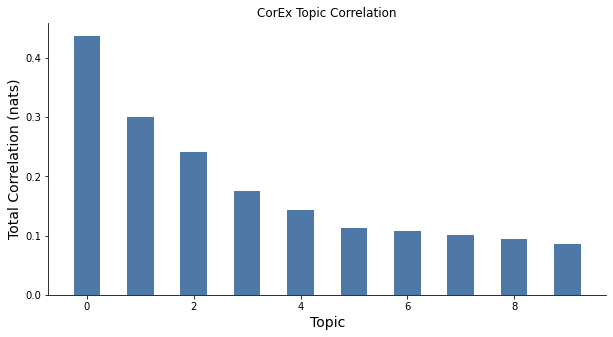

In [24]:
%matplotlib inline
plot_topics(topic_model)

In [25]:
show_top_tweets(topic_model, 5)

Topic 0
1) medizinstudium abiturnote sind praxisbezug ne landarztquote eingef hrt
2) die bergungsarbeiten sind elltra nach zugungl ck
3) love nickiminaj remyma go remyma nikkiminaj bgc shether
4) chi ci chiama accozzaglia non ha cultura politica iovotono
5) downbyseashore eavesdropann bullyuzi jorgenseptember leeds good even maryan

Topic 1
1) fun fact obama administration refuse despite fact saudi arabia egypt uae consider ter
2) huma take order clinton foundation work state dept
3) document show without doubt treason obstruction justice election fraud manipulation bribery ht
4) national debt make trump clinton lame duck policticalnews conservativenews
5) ashley bell head c coordinate gop battleground ef

Topic 2
1) philanthropic plan challenge mission possible impossible tcot ccot via guntrust
2) scotus heart gosnell american thinker abortion prolife texas defundpp pjnet
3) sevigny rob sexyaustrian sfstraighttalk shakira sharylattkisson shaunking
4) dagestani man photo take russian p

### Semi-Supervised Modeling with CorEx Anchoring

In [27]:
anchor_topics = [['donald', 'trump'],                                # trump stuff
                ['hillary', 'clinton'],                              # hillary stuff
                ['merkel', 'muss', 'die', 'ist', 'ich', 'das'],      # german stuff
                ['blacklivesmatter'],                                # BLM/race stuff
                ['police', 'officer', 'shoot'],                      # police stuff
                ['obama', 'barack'],                                 # obama stuff
                ['muslim', 'islam']                                  # isis/islam stuff
               ]

len(anchor_topics)

7

In [28]:
topic_model = ct.Corex(n_hidden=10, 
                       words=words,
                       max_iter=100, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=proc_tweets, 
                anchors=anchor_topics, anchor_strength=8)

In [41]:
def full_topic_report(topic_model, num_tweets_to_show):    
    print("------- Topics -------\n")
    corex_topics(topic_model)
    print('\n------- Top Tweets -------\n')
    show_top_tweets(topic_model, num_tweets_to_show)
    print('\n------- Topic Correlation -------\n')
    print(f'Topic Correlation Score: {topic_model.tc:.2f}')
    plot_topics(topic_model)

In [40]:
topic_model.tc

11.674365085584613

------- Topics -------

Topic 0 keywords: trump, donald, real, president, politic, supporter, maga, poll, rally, say
Topic 1 keywords: clinton, hillary, email, campaign, foundation, fbi, wikileaks, debate, benghazi, crook
Topic 2 keywords: die, merkel, muss, ist, das, ich, sie, es, mit, zu
Topic 3 keywords: blacklivesmatter, play, music, ft, feat, gt, black, hiphop, mixtape, artist
Topic 4 keywords: police, shoot, officer, cop, suspect, arrest, san, dallas, man, brutality
Topic 5 keywords: obama, barack, michelle, administration, admin, legacy, hussein, malia, pres, veto
Topic 6 keywords: islam, muslim, kill, brussels, refugee, isis, prayforbrussels, opiceisis, iceisis, stop
Topic 7 keywords: tcot, pjnet, gop, news, midnight, ccot, cruz, state, election, democrat
Topic 8 keywords: favorite, headline, trumps, enlist, patriot, army, god, west, super, renewus
Topic 9 keywords: new, cnn, medium, york, oscarhasnocolor, session, msnbc, oscars, check, watch

------- Top Tweets -------

Topic 

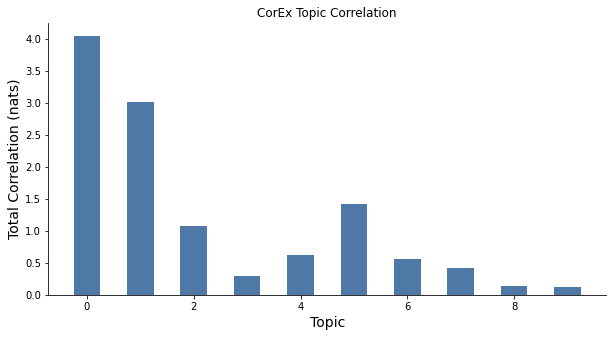

In [42]:
full_topic_report(topic_model, 4)

In [43]:
anchor_topics = [['donald', 'trump'],
                 ['donald', 'trump'],
                 ['donald', 'trump'],
                 ['donald', 'trump'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['merkel', 'muss', 'die', 'ist', 'ich', 'das'],
                 ['pjnet'], 
                 ['police', 'officer', 'cop'],
                 ['god', 'christian', 'jesus']
                ]

len(anchor_topics)

12

In [45]:
topic_model = ct.Corex(n_hidden=14, 
                       words=words,
                       max_iter=100, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=proc_tweets, 
               anchors=anchor_topics, anchor_strength=8)

------- Topics -------

Topic 0 keywords: trump, donald, real, maga, trumps, win, favorite, elect, ivanka, ad
Topic 1 keywords: trump, donald, poll, tower, vote, makeamericagreatagain, obamaswishlist, mexico, hotel, criticize
Topic 2 keywords: trump, donald, president, celebrate, endorse, inauguration, speech, presidency, idrunforpresidentif, hitler
Topic 3 keywords: trump, donald, politic, supporter, rally, melania, trumptrain, headline, comment, deplorables
Topic 4 keywords: clinton, hillary, foundation, wikileaks, debate, benghazi, pneumonia, donor, leak, chelsea
Topic 5 keywords: clinton, hillary, campaign, lie, server, birtherism, aide, investigation, corruption, camp
Topic 6 keywords: clinton, hillary, fbi, birther, blumenthal, hillarys, lockherup, humaabedin, rumor, mcclatchy
Topic 7 keywords: clinton, hillary, email, crook, conspirator, paytoplay, dcleaks, prayforflo, preparefordroning, lockthemup
Topic 8 keywords: die, merkel, muss, ist, das, ich, sie, es, mit, zu
Topic 9 keyw

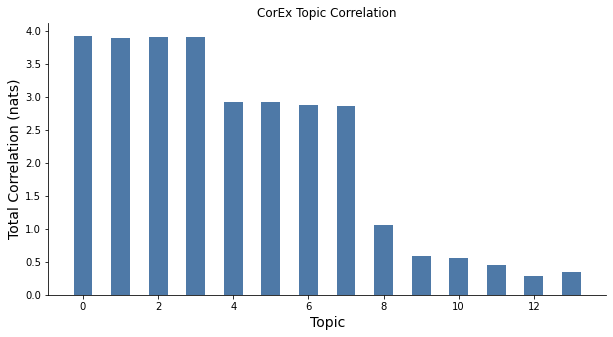

In [46]:
full_topic_report(topic_model, 4)

In [47]:
anchor_topics = [['isis'],
                 ['pjnet'],
                 ['conservative'],
                 ['america'],
                 ['ted', 'cruz'],
                ]

len(anchor_topics)

5

In [48]:
topic_model = ct.Corex(n_hidden=8, 
                       words=words,
                       max_iter=100, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=proc_tweets, 
               anchors=anchor_topics, anchor_strength=8)

------- Topics -------

Topic 0 keywords: isis, islam, kill, refugee, muslim, police, terrorist, brussels, islamic, attack
Topic 1 keywords: pjnet, tcot, ccot, wakeupamerica, teaparty, cruzcrew, tgdn, nra, lnyhbt, tlot
Topic 2 keywords: conservative, merkel, muss, ist, die, sie, das, es, ich, zu
Topic 3 keywords: america, great, make, save, patriot, nobama, hermoxita, join, dare, lisadaca
Topic 4 keywords: cruz, ted, en, la, jadedbypolitics, le, sarcatstyx, les, des, kcarslin
Topic 5 keywords: trump, donald, real, politic, president, gop, election, maga, poll, debate
Topic 6 keywords: clinton, hillary, email, campaign, fbi, wikileaks, medium, foundation, cnn, dnc
Topic 7 keywords: play, game, music, favorite, gt, headline, ft, song, trumps, sport

------- Top Tweets -------

Topic 0
1) wise guy see crimea isis syria warn real donald trump russia via yahoocanada
2) leo hohmann night muslims ride roughshod linden hill minnesota listen
3) israeli jet rocket hit syrianarmy near damascus st

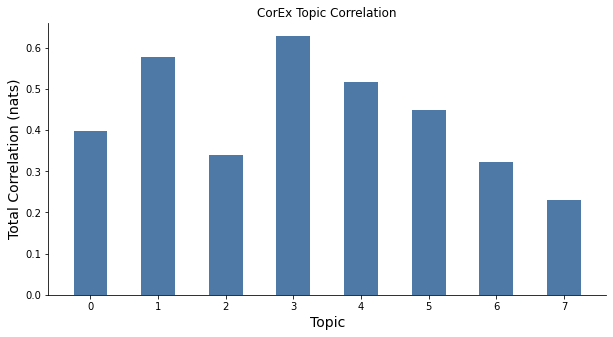

In [49]:
full_topic_report(topic_model, 4)